In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [24]:
file_path = '/content/data.csv'

df = pd.read_csv(file_path)

print(df.head())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [25]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
target_variable = 'price'

df_selected = df[selected_features + [target_variable]]

print(df_selected.head())

   bedrooms  bathrooms  sqft_living  sqft_lot  sqft_above  sqft_basement  \
0       3.0       1.50         1340      7912        1340              0   
1       5.0       2.50         3650      9050        3370            280   
2       3.0       2.00         1930     11947        1930              0   
3       3.0       2.25         2000      8030        1000           1000   
4       4.0       2.50         1940     10500        1140            800   

       price  
0   313000.0  
1  2384000.0  
2   342000.0  
3   420000.0  
4   550000.0  


In [26]:
df.shape

(4600, 18)

In [27]:
df_selected.isnull().sum()

,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
sqft_above,0
sqft_basement,0
price,0


In [28]:
df_selected.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,price
count,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4.600000e+03
mean,3.400870,2.160815,2139.346957,1.485252e+04,1827.265435,312.081522,5.519630e+05
std,0.908848,0.783781,963.206916,3.588444e+04,862.168977,464.137228,5.638347e+05
min,0.000000,0.000000,370.000000,6.380000e+02,370.000000,0.000000,0.000000e+00
25%,3.000000,1.750000,1460.000000,5.000750e+03,1190.000000,0.000000,3.228750e+05
50%,3.000000,2.250000,1980.000000,7.683000e+03,1590.000000,0.000000,4.609435e+05
75%,4.000000,2.500000,2620.000000,1.100125e+04,2300.000000,610.000000,6.549625e+05
max,9.000000,8.000000,13540.000000,1.074218e+06,9410.000000,4820.000000,2.659000e+07


In [29]:
correlation = df_selected.corr()
print(correlation['price'].sort_values(ascending=False))

price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
sqft_basement    0.210427
bedrooms         0.200336
sqft_lot         0.050451
Name: price, dtype: float64


<Axes: >

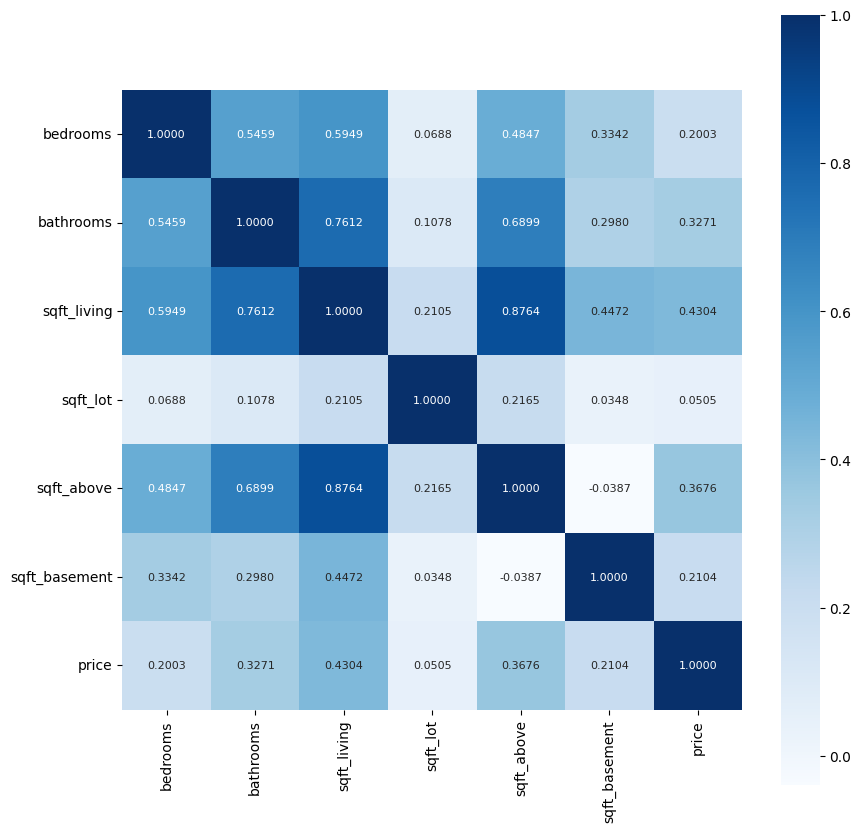

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.4f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [31]:
X = df_selected.drop(['price'], axis=1)
Y = df_selected['price']
print(X)
print(Y)

      bedrooms  bathrooms  sqft_living  sqft_lot  sqft_above  sqft_basement
0          3.0       1.50         1340      7912        1340              0
1          5.0       2.50         3650      9050        3370            280
2          3.0       2.00         1930     11947        1930              0
3          3.0       2.25         2000      8030        1000           1000
4          4.0       2.50         1940     10500        1140            800
...        ...        ...          ...       ...         ...            ...
4595       3.0       1.75         1510      6360        1510              0
4596       3.0       2.50         1460      7573        1460              0
4597       3.0       2.50         3010      7014        3010              0
4598       4.0       2.00         2090      6630        1070           1020
4599       3.0       2.50         1490      8102        1490              0

[4600 rows x 6 columns]
0       3.130000e+05
1       2.384000e+06
2       3.420000e+05


Splitting the data into training data and teat data.

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(4600, 6) (3680, 6) (920, 6)


Model Training

Linear Regression

In [34]:
# loading the model
model = LinearRegression()

In [35]:
# training the model with X_train
model.fit(X_train, Y_train)

LinearRegression()

Evaluation

Prediction on training data


In [36]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)
print(training_data_prediction)

[456751.22242439 221208.96710919 467922.80256805 ... 394907.33016429
 274458.51683271 596674.40187895]


In [37]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

#Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print("Mean Absolute Error : ", score_2)

R squared error :  0.3583087276062027
Mean Absolute Error :  178565.8291889043


Visualizing the actual prices and predicted prices

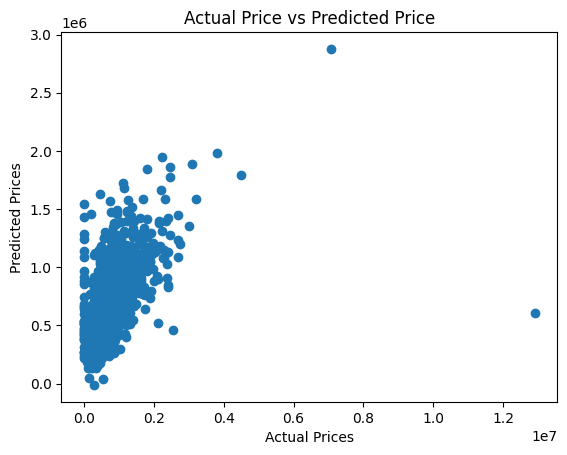

In [38]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

Prediction on Test Data

In [39]:
#accuracy on the prediction of the test data
test_data_prediction = model.predict(X_test)

In [41]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

#Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print("Mean Absolute Error : ", score_2)

R squared error :  0.0553944927218919
Mean Absolute Error :  202849.80538314994
